#### Programa de Formación en ML & DS
## Introducción al Aprendizaje Automático
# Sesión 7: Regresión

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt

# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

# Problema de regresión

<img src="https://drive.google.com/uc?export=view&id=1dWGsXLeIX7Pgxx24Repd7mSMHSk7gnrp" align="middle">

Regresión es un enfoque estadístico que busca encontrar la relación entre variables. En aprendizaje de máquina es usado como un método para predecir el valor de una variable continua (*dependiente*) con base a la relación entre las características, también conocidas como *variables independientes* o *variables explicativas*.

Suponga que $y$ es la variable objetivo y $x$ es la variable explicativa. El objetivo de la regresión es encontrar una línea cuyos parámetros $w$ y $w_0$ se ajusten mejor a los datos:
$$
y = wx + w_0
$$

En 2D, $w$ se conoce como la pendiente, mientras que $w_0$ es la intersección de la recta con $y$. Para medir qué tan bien se ajusta la predicción a los datos, se puede usar el error cuadrático medio:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

Dónde $\hat{y}_i$ corresponde a la predicción hecha por el modelo, mientras $y_i$ corresponde al valor verdadero. A continuación, presentamos un ejemplo en 2D (Una variable explicativa contra una variable objetivo) de cómo entrenar y medir el desempeño de un modelo de regresión. El ejemplo consiste en una curva $sin(x)$ con algo de ruido.

In [0]:
rng = np.random.RandomState(2018)
X = np.linspace(0, 6, 200)
y = np.sin(X).ravel() + np.sin(2 * X).ravel() + X + rng.normal(0, 0.2, X.shape[0])

X = X/6
y = y/6

In [0]:
X.shape

(200, 1)

In [0]:
y.shape

(200,)

Verificamos el tamaño de ambos arreglos:

In [0]:
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (200,)
y shape: (200,)


Para que sea procesado por Scikit-Learn, `X` debe ser un arreglo de arreglos. Cada elemento de `X` debe ser un arreglo de las $n$ variables explicativas del conjunto de datos.

In [0]:
X = X[:, np.newaxis]
print('X shape: {}'.format(X.shape))

X shape: (200, 1)


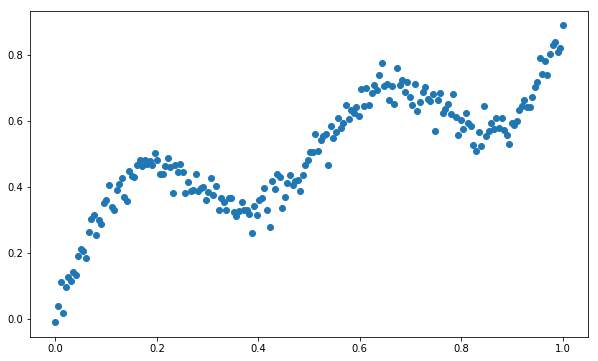

In [0]:
pl.figure(figsize = (10, 6))
pl.plot(X, y, 'o');

## Regresión lineal

Particionamos el conjunto de datos en entrenamiento y prueba

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Usamos `sklearn.linear_model.LinearRegression` para ajustar nuestro modelo a los datos de entrenamiento. Como se ha visto, el API de Scikit-Learn es muy consistente.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

A continuación, podemos extraer también el valor de la pendiente y de la intersección con el eje $y$.

In [0]:
print('Pendiente: {}'.format(regressor.coef_[0]))
print('Intersección en y: {}'.format(regressor.intercept_))

Pendiente: 0.5087158742739564
Intersección en y: 0.2496284120537542


Visualizamos los datos de entrenamiento contra la línea generada por la ecuación:
$$
y = wx + w_0
$$

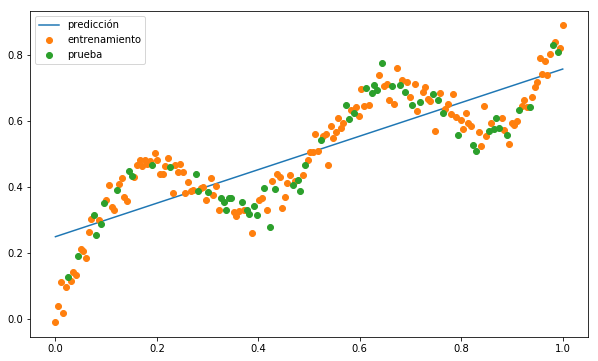

In [0]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

pl.figure(figsize = (10, 6))
pl.plot([X.min(), X.max()], [min_pt, max_pt], label="predicción")
pl.plot(X_train, y_train, 'o', label="entrenamiento");
pl.plot(X_test, y_test, 'o', label="prueba");
pl.legend(loc='best');

Podemos comparar las predicciones del modelo contra los verdadores valores en test:

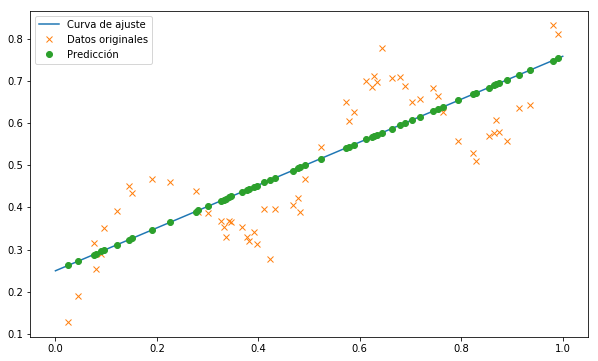

In [0]:
y_pred = regressor.predict(X_test)

pl.figure(figsize = (10, 6))
pl.plot([X.min(), X.max()], [min_pt, max_pt], label="Curva de ajuste")
pl.plot(X_test, y_test, 'x', label="Datos originales");
pl.plot(X_test, y_pred, 'o', label="Predicción");
pl.legend(loc='best');

Finalmente medimos el error cuadrático medio:

In [0]:
from sklearn.metrics import mean_squared_error

pred = regressor.predict(X_test)
mean_squared_error(pred, y_test)

0.00940344823563053

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [5.02512563e-03 2.52518876e-05 1.26893907e-07 6.37657826e-10
  3.20431068e-12]
 [1.00502513e-02 1.01007550e-04 1.01515126e-06 1.02025252e-08
  1.02537942e-10]
 [1.50753769e-02 2.27266988e-04 3.42613550e-06 5.16502839e-08
  7.78647496e-10]
 [2.01005025e-02 4.04030201e-04 8.12121008e-06 1.63240404e-07
  3.28121414e-09]]


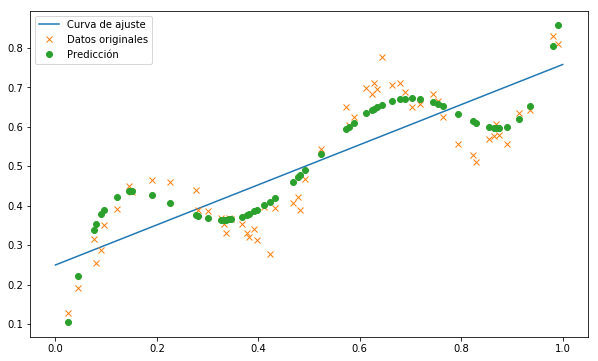

In [0]:
newX = np.concatenate((X,X**2,X**3,X**4,X**5),axis=1)
print(newX[:5, :])
Xn_train, Xn_test, y_train, y_test = train_test_split(newX, y, test_size=0.3, random_state=42)
regressor.fit(Xn_train, y_train)

y_pred = regressor.predict(Xn_test)

pl.figure(figsize = (10, 6))
pl.plot([X.min(), X.max()], [min_pt, max_pt], label="Curva de ajuste")
pl.plot(Xn_test[:,0], y_test, 'x', label="Datos originales");
pl.plot(Xn_test[:,0], y_pred, 'o', label="Predicción");
pl.legend(loc='best');

# Regresión usando modelos no lineales

## DecisionTreeRegression

Los árboles de decisión también pueden ser usados para regresión. Para acceder a la implementación de Scikit-Learn, lo podemos hacer a través de `sklearn.tree.DecisionTreeRegressor`. En el siguiente ejemplo vamos a entrenar dos modelos de distinta complejidad y observaremos como es la predicción generada para los datos de prueba del ejemplo anterior.

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
tree_regressor_4 = DecisionTreeRegressor(max_depth=4)
tree_regressor_10 = DecisionTreeRegressor(max_depth=10)

In [0]:
tree_regressor_4.fit(X_train, y_train)
tree_regressor_10.fit(X_train, y_train);

Reordenamos los valores de `X_train` y `X_test` para poder visualizarlos

In [0]:
idx = np.argsort(X_train.flatten())
X_train_s = X_train[idx]
y_train_s = y_train[idx]

idx = np.argsort(X_test.flatten())
X_test_s = X_test[idx]
y_test_s = y_test[idx]

A continuación, visualizamos las predicciones de ambos modelos. Podemos observar que la complejidad del modelo determina qué tan bien se ajusta a los datos.

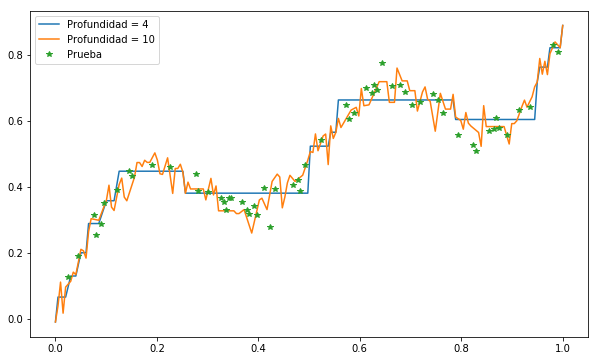

In [0]:
y_pred_4 = tree_regressor_4.predict(X_train_s)
y_pred_10 = tree_regressor_10.predict(X_train_s)

pl.figure(figsize = (10, 6))
pl.plot(X_train_s, y_pred_4, label="Profundidad = 4");
pl.plot(X_train_s, y_pred_10, label="Profundidad = 10");
pl.plot(X_test_s, y_test_s, '*', label="Prueba");
pl.legend(loc='best');

Podemos visualizar también las reglas aprendidas por el árbol de decisión

In [0]:
!pip install graphviz

In [0]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_regressor_4, out_file=None,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

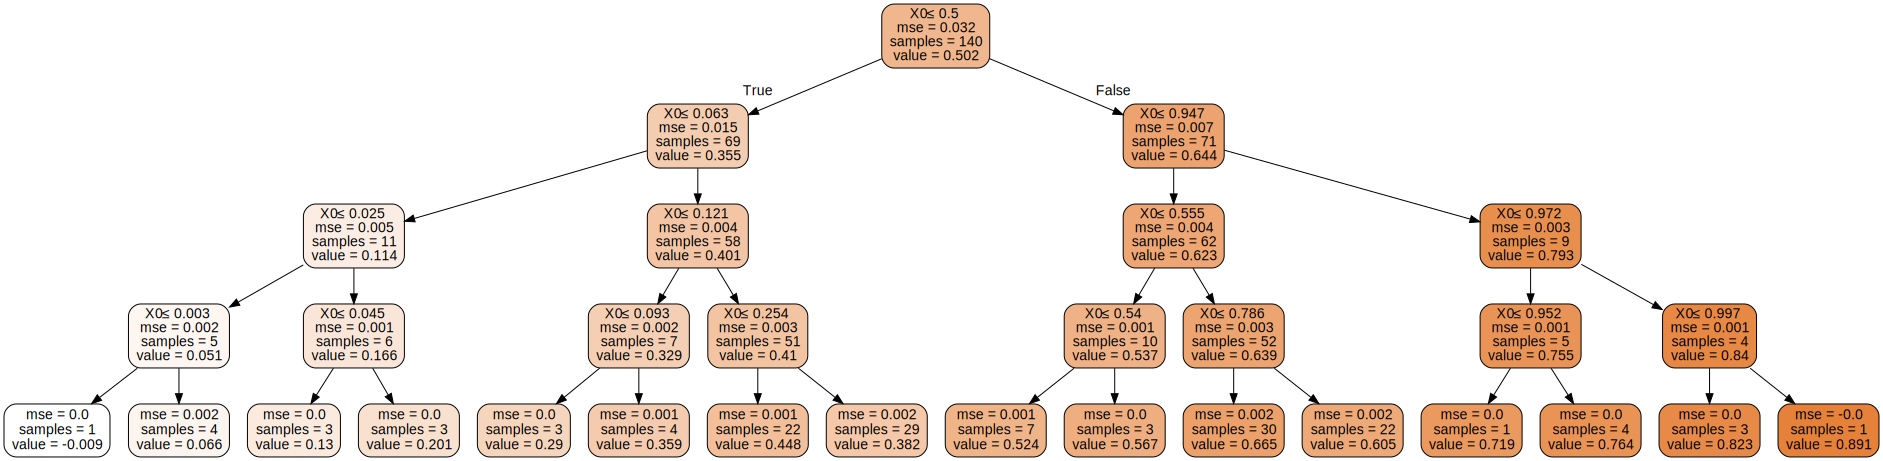

In [0]:
graph

## MLPRegressor

De la misma forma, podemos entrenar una red multicapa para resolver el problema de regresión. Scikit-Learn provee una implementación a través de `sklearn.neural_network.MLPRegressor`. La red multicapa generada por Scikit-Learn difiere de la implementación usada para clasificación, en que esta no tiene función de activación en la capa de salida. Aquí estamos interesados en predecier el valor original de una variable numérica, no necesitamos acotarlo a un rango definido como en el problema de clasificación. La medida por defecto que se usa para determinar el desempeño del modelo es error cuadrático medio (**MSE**).

### Función de activación ReLU

A continuación, introducimos una nueva función de activación conocida como *ReLU*. Las redes multicapa con funciones de activación logística tienen un problema durante el entrenamiento, conocido como el **desvanecimiento del gradiente**. Esto consiste en que la magnitud del gradiente se va haciendo muy pequeña de tal forma que los pesos de varias conexiones de la red multicapa no se actualizan. Esto resulta en que el modelo no resuelve el problema supervisado. La función de activación $\textit{ReLU}$ se usa con el objetivo de resolver ese problema. $\textit{ReLU}$ está definida como:

$$
\textit{ReLU}(x) = \max(0, x)
$$

<img src="https://drive.google.com/uc?export=view&id=1nT30AjTNGiGVayCm07YNE5FsHG73JK9L" align="middle">

In [0]:
from sklearn.neural_network import MLPRegressor

Aquí observamos la arquitectura de la red multicapa del modelo más complejo:

<img src="https://drive.google.com/uc?export=view&id=1rUJOF7Spn0X1vakcQia6fMYT90nKekrp" align="middle">

In [0]:
mlp_regressor_simple = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(10), random_state=1)

mlp_regressor_complex = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(128), random_state=1)

Ajustamos ambos modelos al conjunto de entrenamiento

In [0]:
mlp_regressor_simple.fit(X_train, y_train)
mlp_regressor_complex.fit(X_train, y_train);

Reordenamos los valores de `X_train` y `X_test` para poder visualizarlos

In [0]:
idx = np.argsort(X_train.flatten())
X_train_s = X_train[idx]
y_train_s = y_train[idx]

idx = np.argsort(X_test.flatten())
X_test_s = X_test[idx]
y_test_s = y_test[idx]

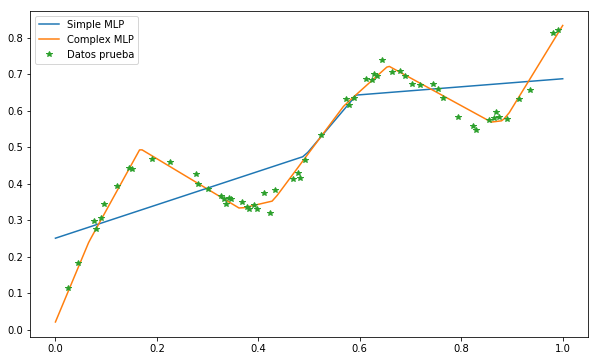

In [0]:
y_pred_one = mlp_regressor_simple.predict(X_train_s)
y_pred_two = mlp_regressor_complex.predict(X_train_s)

pl.figure(figsize = (10, 6))
pl.plot(X_train_s, y_pred_one, label="Simple MLP");
pl.plot(X_train_s, y_pred_two, label="Complex MLP");
pl.plot(X_test_s, y_test_s, '*', label="Datos prueba");
pl.legend(loc='best');

## Comparación de rendimiento en el conjunto de prueba

A continuación, evaluamos los 5 modelos en el conjunto de prueba

In [0]:
pred = regressor.predict(X_test)
mean_squared_error(pred, y_test)

print('MSE Regresión Lineal: {}'.format(mean_squared_error(regressor.predict(X_test), y_test)))
print('MSE Árbol de Decisión (max_depth=4): {}'.format(mean_squared_error(tree_regressor_4.predict(X_test), y_test)))
print('MSE Árbol de Decisión (max_depth=10): {}'.format(mean_squared_error(tree_regressor_10.predict(X_test), y_test)))
print('MSE MLP una capa (10 neuronas): {}'.format(mean_squared_error(mlp_regressor_simple.predict(X_test), y_test)))
print('MSE MLP una capa (128 neuronas): {}'.format(mean_squared_error(mlp_regressor_complex.predict(X_test), y_test)))

MSE Regresión Lineal: 0.008217118201979174
MSE Árbol de Decisión (max_depth=4): 0.0012283354300986664
MSE Árbol de Decisión (max_depth=10): 0.00046995972588609737
MSE MLP una capa (10 neuronas): 0.0053830283635818345
MSE MLP una capa (128 neuronas): 0.00031056553398489835


# Taller Regresión

Durante este taller, se va a trabajar usando el conjunto de datos *Boston*. Este conjunto de datos mide la influencia de factores socioeconómicos en el precio de varias propiedades de la ciudad de Boston. El conjunto cuenta con 506 registros, cada uno caracterizado por 13 variables:

* CRIM: Tasa de crimen per cápita por ciudad
* ZN: Proporción de zona residencial para lotes arriba de 25.000 pies cuadrados
* INDUS: Proporción de hectáreas destinadas a oficinas por ciudad
* CHAS: Variable dummy del rio Charles. (1 si limita con el río, 0 sino)
* NOX: Concentración de partículas de óxido de nitrito (partículas por 10 millones)
* RM: Número promedio de habitaciones por habitante
* AGE: Proporción de unidades ocupadas que hayan sido construídas antes de 1940
* DIS: Distancias ponderadas hacía cinco centros de trabajo de Boston
* RAD: Índice de accesibilidad a autopistas radiales
* TAX: Tasa de impuesto a la propiedad por 10,000 USD
* PTRATIO: Tasa de alumnos-profesor por ciudad
* B: $1000(Bk - 0.63)^2$, donde $Bk$ corresponde a la proporción de personas de la comunidad negra en la ciudad
* LSTAT: Porcentaje de personas de clase baja

Variable de salida:
* MEDV: Precio de la casa en miles de dólares

**Tenga en cuenta:** En este ejercicio siempre vamos a intentar predecir la variable `MEDV` sin importar qué variables explicativas usemos. Es decir, en algunos casos usaremos un subconjunto de los 13 atributos mencionados y en otras, manejaremos los 13 atributos. Pero en ningún caso cambiaremos la variable dependiente $y$.

## Carga de datos:

1. Cargue el conjunto de datos usando `from sklearn.datasets import load_boston`
2. Cree un DataFrame de Pandas usando a partir del atributo `.data` de la función de carga de Scikit-Learn.
3. Asígne las columnas del DataFrame de tal forma que sean igual al atributo `.feature_names` de la función de carga de Scikit-Learn.
4. Agregue una nueva columna al DataFrame que contenga el valor a predecir, es decir, el atributo `.target` de la función de carga de Scikit-Learn. El nombre de esta columna debe ser `MEDV`.
5. Use la función `.describe()` de Pandas para obtener estadísticas acerca de cada columna.

## Análisis de características:

Usando el DataFrame generado en la sección anterior:
* Filtre el conjunto de datos a solo estas características:
    * Explicativas: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
    * Dependiente: 'MEDV'.
* Genere una matriz scatter entre las características mencionadas arriba usando Pandas (`scatter_matrix`) o Seaborn (`pairplot`).
    * ¿Encuentra alguna relación entre las características?
* Genera la matriz de correlación entre estas variables usando `numpy.corrcoef`. Incluya también `MEDV`.
    * ¿Qué características están más correlacionadas?
    * BONUS: Visualice esta matriz como mapa de calor usando Pandas, Matplotlib o Seaborn.

## Modelando relaciones lineales y no lineales

* Genere dos nuevos subconjuntos filtrando estas características:
    * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
    * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* Para cada subconjunto, genere una partición de entrenamiento y otra de prueba usando una proporción $70\%-30\%$
* Entrene un modelo de regresión lineal sobre ambos subconjuntos de datos:
    * Reporte el error cuadrático medio sobre el conjunto de prueba
    * Imprima los valores de $w$ y $w_0$ de la ecuación de regresión
    * Genere una gráfica donde visualice la línea obtenida por el modelo de regresión en conjunto con los datos de entrenamiento y los datos de prueba
* Entrene un modelo de regresión usando árboles de decisión de profundidad máxima de 4 sobre ambos subconjuntos de datos:
    * Reporte el error cuadrático medio sobre el conjunto de prueba
    * Genere una gráfica donde visualice la línea obtenida por el modelo de regresión en conjunto con los datos de entrenamiento y los datos de prueba
* ¿Qué modelo tiene mejor desempeño sobre $D_1$? ¿Qué modelo tiene mejor desempeño sobre $D_2$? ¿Por qué?

## Entrenamiento de un modelo de regresión

* Genere un particionamiento 70-30 de los datos **usando todas las características**. (No incluya la variable dependiente `MEDV`)
* Entrene un modelo de regresión lineal con el objetivo de predecir la variable de salida `MEDV`.
    * Reporte el error cuadrático medio sobre el conjunto de prueba
* Entrene un modelo de regresión usando `MLPRegressor` con el objetivo de predecir la variable de salida `MEDV`. 
    * Reporte el error cuadrático medio sobre el conjunto de prueba
* Escale los datos para que tengan media cero varianza uno por característica (solo $X$). Puede usar la siguiente pieza de código:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Puede consultar más acerca de `StandardScaler` [aquí](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
* Entrene los siguientes modelos:
    1. Entrene un modelo de regresión lineal usando los datos escalados.
        * Reporte el error cuadrático medio sobre el conjunto de prueba
    2. Entrene un modelo de regresión usando un MultiLayerPerceptron de 2 capas (128 neuronas en la primera y 512 en la segunda) y con los **datos escalados**.
        * Reporte el error cuadrático medio sobre el conjunto de prueba
    3. ¿Cuál modelo tiene mejor desempeño? ¿Por qué?

In [0]:
from sklearn.datasets import load_boston
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

boston = load_boston()

In [0]:
#Lectura de la base de datos
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
# Definición de la variable respuesta en el modelo (variable dependiente y)
df['MEDV']=boston.target

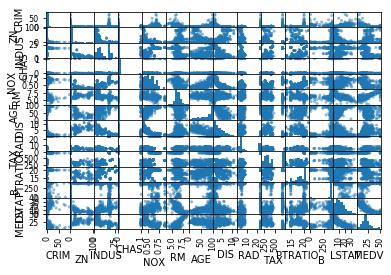

In [9]:
#Matriz de diagramas de dispersión
scatter_matrix(df)
plt.show()

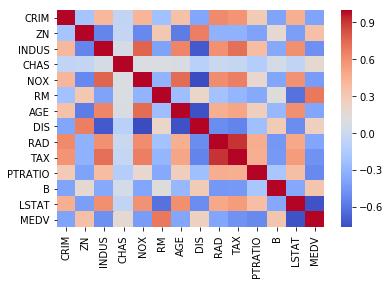

In [0]:
#Matriz de calor del coeficiente de dispersión
import seaborn as sns
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

Las variable de mayor correlación corresponden con TAX versus RAD.

In [0]:
#Redefinición de las matrices X para cada modelo
X1=df['RM'].values.reshape(-1,1)
X2=df['LSTAT'].values.reshape(-1,1)
y=df['MEDV'].values

In [13]:
X1.shape

(506, 1)

In [0]:
#Partición de la muestra en entrenamiento y prueba (matriz X1 con la información de la variable RM)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [17]:
#Partición de la muestra en entrenamiento y prueba (matriz X2 con la información de la variable LSTAT)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [18]:
#Ajuste de modelos de regresión
#Modelo 1. Variable independiente X1 = RM
regressor1 = LinearRegression()
regressor1.fit(X1_train, y_train)
#Modelo 1. Variable independiente X2 = LSTAT
regressor2 = LinearRegression()
regressor2.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Error cuadrático medio del modelo 1.
from sklearn.metrics import mean_squared_error

pred1 = regressor1.predict(X1_test)
mean_squared_error(pred1, y_test)

40.35144969787305

In [21]:
# Error cuadrático medio del modelo 2.
pred2 = regressor2.predict(X2_test)
mean_squared_error(pred2, y_test)

38.0987021824347

In [0]:
# Parámetros estimados del modelo 1.
print('Pendiente: {}'.format(regressor1.coef_[0]))
print('Intersección en y: {}'.format(regressor1.intercept_))

Pendiente: 9.118102197303786
Intersección en y: -34.662307438406785


In [22]:
# Parámetros estimados del modelo 2.
print('Pendiente: {}'.format(regressor2.coef_[0]))
print('Intersección en y: {}'.format(regressor2.intercept_))

Pendiente: -0.9862032105333924
Intersección en y: 35.26557743777449


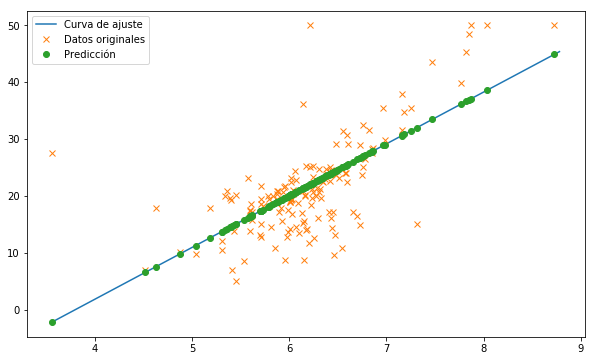

In [24]:
# Grafica asociada con el modelo 1.
min1_pt = X1.min() * regressor1.coef_[0] + regressor1.intercept_
max1_pt = X1.max() * regressor1.coef_[0] + regressor1.intercept_
y_pred1 = regressor1.predict(X1_test)

pl.figure(figsize = (10, 6))
pl.plot([X1.min(), X1.max()], [min1_pt, max1_pt], label="Curva de ajuste")
pl.plot(X1_test, y_test, 'x', label="Datos originales");
pl.plot(X1_test, y_pred1, 'o', label="Predicción");
pl.legend(loc='best');

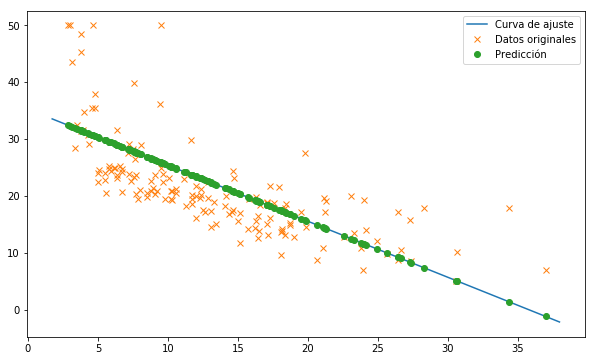

In [25]:
# Grafica asociada con el modelo 2.
min2_pt = X2.min() * regressor2.coef_[0] + regressor2.intercept_
max2_pt = X2.max() * regressor2.coef_[0] + regressor2.intercept_
y_pred2 = regressor2.predict(X2_test)

pl.figure(figsize = (10, 6))
pl.plot([X2.min(), X2.max()], [min2_pt, max2_pt], label="Curva de ajuste")
pl.plot(X2_test, y_test, 'x', label="Datos originales");
pl.plot(X2_test, y_pred2, 'o', label="Predicción");
pl.legend(loc='best');

In [26]:
#Mdelos a través de árboles de regresión
# Modelo 3. Variable independiente X1 = RM
from sklearn.tree import DecisionTreeRegressor
tree_regressor_4_1 = DecisionTreeRegressor(max_depth=4)
tree_regressor_4_1.fit(X1_train, y_train)

# Modelo 4. Variable independiente X2 = LSTAT
tree_regressor_4_2 = DecisionTreeRegressor(max_depth=4)
tree_regressor_4_2.fit(X2_train, y_train)



DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred1=tree_regressor_4_1.predict(X1_test)
y_pred2=tree_regressor_4_2.predict(X2_test)

In [28]:
# Error cuadrático medio del modelo 3.
mean_squared_error(y_test, y_pred1)

32.42876659811934

In [30]:
# Coeficiente de determinación modelo 3.
r2_score(y_test, y_pred1)

0.5647910430914389

In [29]:
# Error cuadrático medio del modelo 4.
mean_squared_error(y_test, y_pred2)

32.46523277560673

In [31]:
# Coeficiente de determinación modelo 4.
r2_score(y_test, y_pred2)

0.5643016502241921

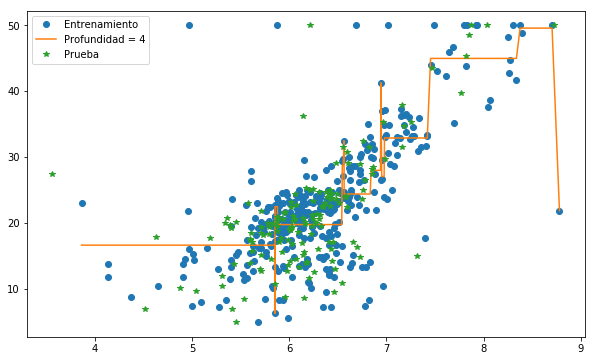

In [33]:
# Grafica asociada con el modelo 3.
idx1 = np.argsort(X1_train.flatten())
X1_train_s = X1_train[idx1]
y_train_s = y_train[idx1]

idx1 = np.argsort(X1_test.flatten())
X1_test_s = X1_test[idx1]
y_test_s = y_test[idx1]
y_pred_4_1 = tree_regressor_4_1.predict(X1_train_s)

pl.figure(figsize = (10, 6))
pl.plot(X1_train_s, y_train_s, 'o' ,label="Entrenamiento");
pl.plot(X1_train_s, y_pred_4_1, label="Profundidad = 4");
pl.plot(X1_test_s, y_test_s, '*', label="Prueba");
pl.legend(loc='best');

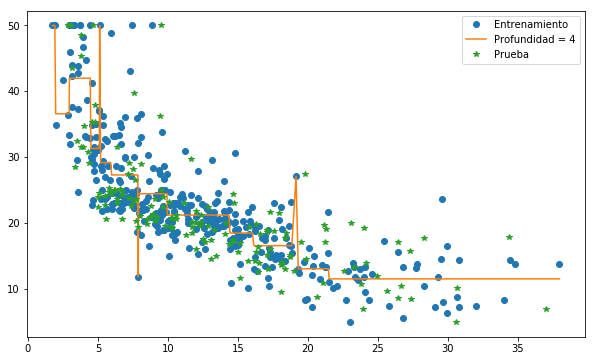

In [34]:
# Grafica asociada con el modelo 4.
idx2 = np.argsort(X2_train.flatten())
X2_train_s = X2_train[idx2]
y_train_s = y_train[idx2]

idx2 = np.argsort(X2_test.flatten())
X2_test_s = X2_test[idx2]
y_test_s = y_test[idx2]
y_pred_4_2 = tree_regressor_4_2.predict(X2_train_s)

pl.figure(figsize = (10, 6))
pl.plot(X2_train_s, y_train_s, 'o' ,label="Entrenamiento");
pl.plot(X2_train_s, y_pred_4_2, label="Profundidad = 4");
pl.plot(X2_test_s, y_test_s, '*', label="Prueba");
pl.legend(loc='best');

In [39]:
y_pred_4_1_1 = tree_regressor_4_1.predict(X1_test_s)
mean_squared_error(y_test_s, y_pred_4_1_1)

172.3386045521399

In [40]:
r2_score(y_test_s, y_pred_4_1_1)

-1.3128633059563701

In [37]:
y_pred_4_2_2 = tree_regressor_4_2.predict(X2_test_s)
mean_squared_error(y_test_s, y_pred_4_2_2)

32.46523277560673

In [38]:
r2_score(y_test_s, y_pred_4_2_2)

0.5643016502241921

Qué modelo tiene mejor desempeño sobre  D1 ? ¿Qué modelo tiene mejor desempeño sobre  D2 ?

Para el caso de D1 el modelo que mejor se ajusta es el lineal ya que es el que tiene un menor Error Cuadrático Medio.

Mientras que para D2 el caso es el contrario el modelo que tiene un Error Cuadrático Medio menor es el regresor de arbol de regresión.



## Entrenamiento de un modelo de regresión

* Genere un particionamiento 70-30 de los datos **usando todas las características**. (No incluya la variable dependiente `MEDV`)
* Entrene un modelo de regresión lineal con el objetivo de predecir la variable de salida `MEDV`.
    * Reporte el error cuadrático medio sobre el conjunto de prueba
* Entrene un modelo de regresión usando `MLPRegressor` con el objetivo de predecir la variable de salida `MEDV`. 
    * Reporte el error cuadrático medio sobre el conjunto de prueba
* Escale los datos para que tengan media cero varianza uno por característica (solo $X$). Puede usar la siguiente pieza de código:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Puede consultar más acerca de `StandardScaler` [aquí](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
* Entrene los siguientes modelos:
    1. Entrene un modelo de regresión lineal usando los datos escalados.
        * Reporte el error cuadrático medio sobre el conjunto de prueba
    2. Entrene un modelo de regresión usando un MultiLayerPerceptron de 2 capas (128 neuronas en la primera y 512 en la segunda) y con los **datos escalados**.
        * Reporte el error cuadrático medio sobre el conjunto de prueba
    3. ¿Cuál modelo tiene mejor desempeño? ¿Por qué?

In [41]:
# Definición de la matriz X con todas las carateristicas
X = pd.DataFrame(data=boston.data,columns=boston.feature_names).values
X.shape

(506, 13)

In [42]:
y.shape

(506,)

In [44]:
# Partición de la muestra en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión 5 (X tiene todas las carateristicas)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_test1 =  regressor.predict(X_test)

In [47]:
# Error cuadrático medio del modelo 5. (X tiene todas las carateristicas)
mean_squared_error(y_pred_test1,y_test)

21.517444231176903

In [49]:
# Modelo de regresión 6. MLP - Red neronal (X tiene todas las carateristicas)
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',hidden_layer_sizes=(128,512), random_state=1)
mlp_regressor.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(128, 512), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
y_pred_test2 =  mlp_regressor.predict(X_test)
# Error cuadrático medio del modelo 6. (X tiene todas las carateristicas)
mean_squared_error(y_pred_test2,y_test)

25.204440390246884

###Modelo Escalado

In [0]:
# Escalamiento de los datos
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

In [53]:
# Modelo 7. Regresión con datos escalados
regressor1 = LinearRegression()
regressor1.fit(X_train_s, y_train)
y_pred_test_1_1 =  regressor1.predict(X_test_s)
# Error cuadratico medio del modelo 7.
mean_squared_error(y_pred_test_1_1,y_test)

21.517444231177276

In [54]:
# Modelo 8. MLP con datos escalados dos capas con 128 y 512 neuronas, respectivamente.
mlp_regressor2 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',hidden_layer_sizes=(128,512), random_state=1)
mlp_regressor2.fit(X_train_s, y_train)
y_pred_test_2_2 =  mlp_regressor2.predict(X_test_s)
# Error cuadratico medio del modelo 8.
mean_squared_error(y_pred_test_2_2,y_test)

15.0030413525413

In [55]:
# Modelo 9. MLP con datos escalados dos capas con 7 y 5 neuronas, respectivamente.
mlp_regressor2 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',hidden_layer_sizes=(7,5), random_state=1)
mlp_regressor2.fit(X_train_s, y_train)
y_pred_test_2_2 =  mlp_regressor2.predict(X_test_s)
# Error cuadratico medio del modelo 9.
mean_squared_error(y_pred_test_2_2,y_test)

15.451845595747494

Qué modelo tiene mejor desempeño

Para el modelo sin escalar el modelo lineal tiene un error cuadrático medio menor que el Multilayer Perceptron

Mientras que para el modelo escalado el Multilayer Perceptron tiene un error cuadrático medio menor que el modelo lineal y los demás modelos entrenados.

Se observa que utlizando un MLP con dos capas de 7 y 5 neuronas  contra un modelo de 128 y 512 tiene una reducción muy baja en el error cuadratico medio.